In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
sber_data = pd.read_csv('opendata.csv', encoding = 'cp1251')
sber_data['date'] = pd.to_datetime(sber_data['date'])

sber_data.head()

,name,region,date,value
0,Количество заявок на потребительские кредиты,Россия,2013-01-15,571147
1,Количество заявок на потребительские кредиты,Россия,2013-02-15,504508
2,Количество заявок на потребительские кредиты,Россия,2013-03-15,628803
3,Количество заявок на потребительские кредиты,Россия,2013-04-15,836054
4,Количество заявок на потребительские кредиты,Россия,2013-05-15,867235


In [3]:
all_topics = sber_data['name'].unique()

print(all_topics)

['Количество заявок на потребительские кредиты'
 'Средняя сумма заявки на потребительский кредит'
 'Количество заявок на ипотечные кредиты'
 'Средняя сумма заявки на ипотечный кредит' 'Количество новых депозитов'
 'Средняя сумма нового депозита' 'Средняя зарплата' 'Средняя пенсия'
 'В среднем руб. на текущем счете на человека'
 'В среднем депозитов в руб. на человека' 'Средние расходы по картам'
 'Средний чек в формате Фастфуд' 'Средний чек в формате Ресторан'
 'Средние траты в ресторане фастфуд' 'Средние траты в ресторане']


In [4]:
def plot_sber_data(topic, regions, from_date, to_date):
    if from_date >= to_date:
        from_date, to_date = to_date, from_date
    
    sber_data_by_topic = sber_data[sber_data['name'] == topic]
    
    regions_mask = sber_data_by_topic['region'].isin(regions)

    dates_mask = (from_date <= sber_data_by_topic['date']) & \
                 (sber_data_by_topic['date'] <= to_date)

    all_masked_data = sber_data_by_topic.loc[dates_mask & regions_mask, :]

    all_regions = sber_data['region'].unique()

    for region in regions:
        if not region in all_regions:
            continue
        region_data = all_masked_data.loc[all_masked_data['region'] == region]
        plt.plot(region_data['date'], region_data['value'], marker='o', label=region)
    
    plt.title(topic)
    plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
    plt.xticks(rotation=30)
    plt.grid(True)
    plt.show()

In [5]:
topic_1 = all_topics[-2]

In [6]:
from_date_1 = pd.Timestamp('2018-06-15')
to_date_1 = pd.Timestamp('2014-06-14')

In [7]:
regions_1 = ['Москва', 'Московская область', 'Россия', 'Брянская область', 'Лондон']

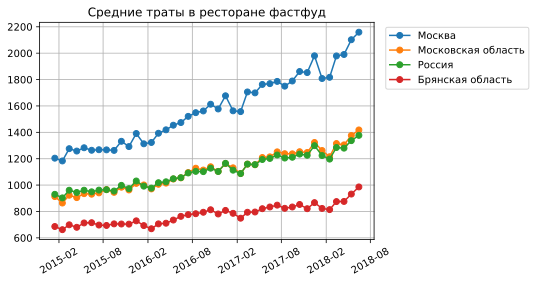

In [8]:
plot_sber_data(topic_1, regions_1, from_date_1, to_date_1)

In [9]:
topic_2 = all_topics[-5]

In [10]:
from_date_2 = sber_data['date'].min()
to_date_2 = sber_data['date'].max()

In [11]:
regions_2 = ['Россия', 'Ленинградская область', 'Алтайский край', 'Республика Карелия']

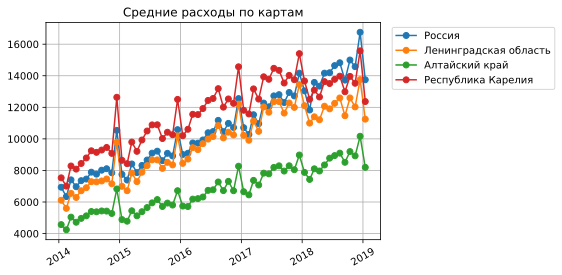

In [12]:
plot_sber_data(topic_2, regions_2, from_date_2, to_date_2)